# Basic Popularity and Price Prediction of Phone Models

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("phones_data.csv")

# Preprocessing

All data was in UAH but I'm familliar with the american pricing, so I used UAH to Dollar 2019 conversion rate, also accounting for a premium that buyers may have to pay in Ukraine.

In [3]:
def uah_to_dollar(uah):
    return uah * 0.038

df.best_price = df.best_price.apply(uah_to_dollar)
df.lowest_price = df.lowest_price.apply(uah_to_dollar)
df.highest_price = df.highest_price.apply(uah_to_dollar)

In [4]:
temp_memory = df['memory_size'] * 1000
df['memory_size'] = df['memory_size'].mask(df['memory_size'] < 1, other=temp_memory)
df['ram'] = df[df["memory_size"] < 32]['memory_size']
df['rom'] = df[df['memory_size'] > 32]['memory_size']
df['ram'] = df['ram'].fillna(df['ram'].median())
df['rom'] = df['rom'].fillna(df['rom'].median())
df.drop(["Unnamed: 0", "model_name", "memory_size"], inplace=True, axis=1)
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

<Axes: xlabel='ram', ylabel='Count'>

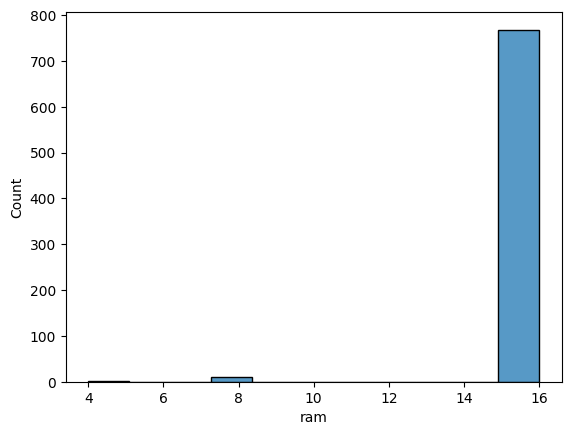

In [5]:
sns.histplot(data=df, x='ram')

<Axes: xlabel='popularity', ylabel='Probability'>

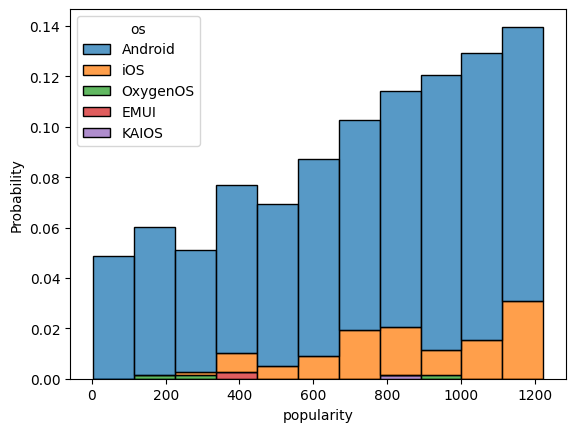

In [6]:
sns.histplot(df, x='popularity' , hue='os', multiple='stack', stat='probability')

<Axes: xlabel='best_price'>

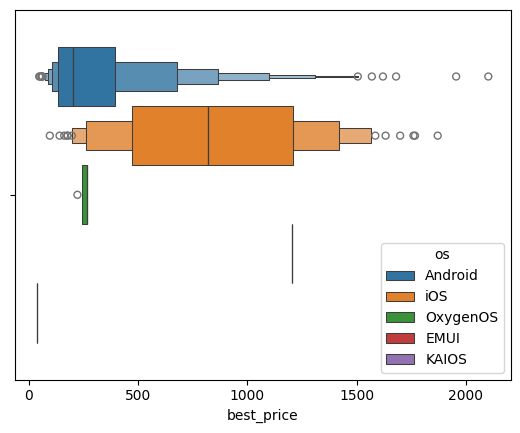

In [7]:
sns.boxenplot(df, x='best_price', hue='os')

In [8]:
df

,brand_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,battery_size,release_date,ram,rom
0,ALCATEL,Android,422,64.220,58.102,69.122,36,5.00,2000.0,10-2020,8.0,128.0
1,ALCATEL,Android,323,68.514,63.042,94.582,36,5.00,2000.0,9-2020,16.0,128.0
2,ALCATEL,Android,299,68.514,63.042,94.582,36,5.00,2000.0,9-2020,16.0,128.0
3,ALCATEL,Android,287,68.514,63.042,94.582,36,5.00,2000.0,9-2020,16.0,128.0
4,Honor,Android,71,412.870,403.978,421.762,2,5.80,3400.0,6-2018,16.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
775,Apple,iOS,842,1033.220,803.700,1147.600,47,6.50,3174.0,9-2018,16.0,512.0
776,Apple,iOS,1101,862.030,608.684,1060.200,61,6.50,3174.0,9-2018,16.0,64.0
777,Apple,iOS,530,934.800,833.682,1281.360,28,6.50,3174.0,9-2018,16.0,64.0
778,HUAWEI,Android,1174,334.552,303.962,379.962,18,6.26,3750.0,11-2019,16.0,128.0


Memory size was sometimes referring to RAM values while other times it was referring to ROM values.

In [9]:
from sklearn.preprocessing import OneHotEncoder

Brand names play a huge role in the pricing of a phone. Some brands are linked to more competetive phones, with more popularity.
Simillarly, release date also plays a huge role in impacting phone prices, as older lower spec models were priced simillarly to newer higher spec models.

In [10]:
def one_hot_encode(col_name, df):
    ohe = OneHotEncoder(sparse_output=False)
    ohe.fit(df[[col_name]])
    labels = ohe.transform(df[[col_name]])
    new_df = pd.DataFrame(labels, columns=ohe.get_feature_names_out())
    df = df.merge(new_df, left_index=True, right_index=True)
    return df.drop(col_name, axis=1)

df = one_hot_encode('brand_name', df)
df = one_hot_encode('os', df)

In [11]:
def transform_date(date: str) -> int:
    return int(date.split('-')[1])
df.release_date = df.release_date.transform(transform_date)

In [12]:
X = df.drop(['popularity', 'best_price', 'lowest_price', 'highest_price', 'sellers_amount'], axis=1)
Y = df[['best_price']]

In [13]:
X

,screen_size,battery_size,release_date,ram,rom,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,brand_name_Apple,...,brand_name_Vodafone,brand_name_Xiaomi,brand_name_ZTE,brand_name_realme,brand_name_vivo,os_Android,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS
0,5.00,2000.0,2020,8.0,128.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,5.00,2000.0,2020,16.0,128.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.00,2000.0,2020,16.0,128.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5.00,2000.0,2020,16.0,128.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5.80,3400.0,2018,16.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,6.50,3174.0,2018,16.0,512.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
776,6.50,3174.0,2018,16.0,64.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
777,6.50,3174.0,2018,16.0,64.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
778,6.26,3750.0,2019,16.0,128.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
Y

,best_price
0,64.220
1,68.514
2,68.514
3,68.514
4,412.870
...,...
775,1033.220
776,862.030
777,934.800
778,334.552


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Model Selection

I decided to start testing with K-Nearest Neighbors, Random Forests and Decision Trees.

When a company makes a phone, it first chooses a bracket e.g. Budget, Mid-range, Flagship-Killer, Flagship.

According to this bracket, the best specs possible are then chosen. My model tries to make the same decisions given the specs. It is really intuitive to think of this as a series of decisions, hence my choice for the decision trees based models.

The above can also be modelled as a simillarity problem, where a theoretical phone is priced simillarly to other phones already in the market. This is a simulation of an actual market. Hence my choice for KNN. A possible shortcoming of this approach is the gift of foresight. A phone that came out in 2015 might be influenced by the pricing of a phone in 2016. However, pricing in 2015 and 2016 can differ a lot in the case of surprising technical advances between the two years.

# Observations

Model performs well on simple bigger number higher price tasks. It has also managed to capture the brand premium component of a device. A phone from Apple will cost more than a phone with the same specs from OnePlus.

In [51]:
X_pop = df.drop(['popularity', 'best_price', 'lowest_price', 'highest_price', 'sellers_amount'], axis=1)
Y_pop = df[['popularity']]

from sklearn.preprocessing import MinMaxScaler

X_pop_scaled = X_pop
X_pop_scaled[['screen_size', 'battery_size', 'release_date', 'ram', 'rom']] = MinMaxScaler().fit_transform(X_pop_scaled[['screen_size', 'battery_size', 'release_date', 'ram', 'rom']])
Y_pop_scaled = MinMaxScaler().fit_transform(Y_pop)
X_pop_train, X_pop_test, Y_pop_train, Y_pop_test = train_test_split(X_pop_scaled, Y_pop_scaled, test_size=0.2)

In [52]:
from sklearn.metrics import r2_score, root_mean_squared_error

def print_stats(Y_train, Y_pred_train, Y_test, Y_pred_test):
    train_rmse = root_mean_squared_error(Y_train, Y_pred_train)
    test_rmse = root_mean_squared_error(Y_test, Y_pred_test)
    train_r2 = r2_score(Y_train, Y_pred_train)
    test_r2 = r2_score(Y_test, Y_pred_test)

    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"Training R2 Score: {train_r2}")
    print(f"Testing R2 Score: {test_r2}")


# GridCV to search for best parameters

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA

models = {
    # "DecisionTree": make_pipeline(DecisionTreeRegressor()),
    # "KNN": make_pipeline(StandardScaler(), KNeighborsRegressor()),
     "RFR": make_pipeline(RandomForestRegressor()),
     "AdaBoost": make_pipeline(AdaBoostRegressor(DecisionTreeRegressor())),
    "GB": make_pipeline(GradientBoostingRegressor())
}
params = {
    "RFR": {
         "randomforestregressor__n_estimators": [300, 500],
    },
    # "DecisionTree": {
    #      "decisiontreeregressor__splitter": ["best", "random"],
    #      "decisiontreeregressor__max_depth": [5, 10, 15, None],
    # },
    # "KNN" : {
    #      "kneighborsregressor__n_neighbors": [3, 5, 7, 10]
    # },
    "AdaBoost" :{
        "adaboostregressor__n_estimators" : [100, 200]
    },
    "GB": {
        "gradientboostingregressor__n_estimators": [200, 500]
    }
}

In [55]:
results = {}
for model_name, model in models.items():
    print(model_name)
    grid = GridSearchCV(model, params[model_name], cv=5, n_jobs=-1, verbose=0)
    grid.fit(X_pop_train, Y_pop_train)
    results[model_name] = {
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        'model': grid
    }

RFR


/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was

AdaBoost


/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d arr

GB


/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/home/cosmic/coding/ml/.venv/lib/python3.12/site-packages/sklearn/ensembl

In [56]:
results

{'RFR': {'best_score': 0.4915169899504388,
  'best_params': {'randomforestregressor__n_estimators': 500},
  'model': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('randomforestregressor',
                                          RandomForestRegressor())]),
               n_jobs=-1,
               param_grid={'randomforestregressor__n_estimators': [300, 500]})},
 'AdaBoost': {'best_score': 0.4826767937758706,
  'best_params': {'adaboostregressor__n_estimators': 200},
  'model': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('adaboostregressor',
                                          AdaBoostRegressor(estimator=DecisionTreeRegressor()))]),
               n_jobs=-1,
               param_grid={'adaboostregressor__n_estimators': [100, 200]})},
 'GB': {'best_score': 0.4502187737858165,
  'best_params': {'gradientboostingregressor__n_estimators': 200},
  'model': GridSearchCV(cv=5,
               estimator=Pipeline(steps=[('gradientboostingregressor',
        

On the basis of the above results, I decided to choose RFR. My guess for KNN performing worse than RFR is becuase of the extra noise introduced by RAM and ROM missing values.

In [57]:
for model_name, result in results.items():
    print(f"{model_name}:", result['model'].score(X_pop_test, Y_pop_test))

RFR: 0.5674493674534971
AdaBoost: 0.5607770332018445
GB: 0.5893862595945158


In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
X_pop.shape
X_pop.columns


Index(['sellers_amount', 'screen_size', 'battery_size', 'release_date', 'ram',
       'rom', 'brand_name_2E', 'brand_name_AGM', 'brand_name_ALCATEL',
       'brand_name_ASUS', 'brand_name_Apple', 'brand_name_Archos',
       'brand_name_BlackBerry', 'brand_name_Blackview', 'brand_name_Bluboo',
       'brand_name_CAT', 'brand_name_Coolpad', 'brand_name_Cubot',
       'brand_name_DOOGEE', 'brand_name_Elephone', 'brand_name_Google',
       'brand_name_HTC', 'brand_name_HUAWEI', 'brand_name_Honor',
       'brand_name_LEAGOO', 'brand_name_LG', 'brand_name_Lenovo',
       'brand_name_Meizu', 'brand_name_Microsoft', 'brand_name_Motorola',
       'brand_name_Nokia', 'brand_name_OPPO', 'brand_name_OnePlus',
       'brand_name_Oukitel', 'brand_name_Philips', 'brand_name_Samsung',
       'brand_name_Sharp', 'brand_name_Sigma mobile', 'brand_name_Sony',
       'brand_name_Tecno', 'brand_name_UMIDIGI', 'brand_name_Ulefone',
       'brand_name_Vernee', 'brand_name_Vodafone', 'brand_name_Xiaomi',
    

In [60]:
X_pop_train

,sellers_amount,screen_size,battery_size,release_date,ram,rom,brand_name_2E,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,...,brand_name_Vodafone,brand_name_Xiaomi,brand_name_ZTE,brand_name_realme,brand_name_vivo,os_Android,os_EMUI,os_KAIOS,os_OxygenOS,os_iOS
325,2,0.596491,0.130435,0.500,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
132,14,0.684211,0.441739,0.875,1.0,0.068376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
776,61,0.719298,0.145565,0.625,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
428,18,0.714035,0.234783,0.875,1.0,0.205128,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
189,2,0.649123,0.130435,0.625,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,54,0.543860,0.252174,0.750,1.0,0.068376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
87,14,0.629825,0.339130,0.750,1.0,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
728,112,0.526316,0.063217,0.875,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
305,16,0.719298,0.260870,0.875,1.0,0.068376,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [61]:
X_pop_train.shape

(624, 53)

In [62]:
net = keras.Sequential ([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

net.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])

In [63]:
net.fit(X_pop_train, Y_pop_train, epochs=50)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1234 - r2_score: -0.5945
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0651 - r2_score: 0.1960 
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0582 - r2_score: 0.2663 
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0479 - r2_score: 0.3610 
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0483 - r2_score: 0.3798 
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0452 - r2_score: 0.4162 
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0474 - r2_score: 0.3773 
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0428 - r2_score: 0.4460 
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0394 - r2_score: 0.4623 
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.0391 - r2_score: 0.4674
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0405 - r2_score: 0.4721
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 

In [64]:
net.evaluate(X_pop_test, Y_pop_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0337 - r2_score: 0.5107  


[0.03439365327358246, 0.5242118835449219]

In [65]:
X_pop_train.shape

(624, 53)

In [34]:
net.predict(X_pop_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.6528102 ],
       [0.50804716],
       [0.77601385],
       [0.6013886 ],
       [0.5864152 ],
       [0.54271734],
       [0.76889706],
       [0.82190436],
       [0.86647063],
       [0.6755949 ],
       [0.5974122 ],
       [0.39488217],
       [0.28419468],
       [0.5775029 ],
       [0.66515857],
       [0.6925043 ],
       [0.38525808],
       [0.5576394 ],
       [0.70912683],
       [0.5457813 ],
       [0.70310295],
       [0.71624273],
       [0.65533507],
       [0.43605724],
       [0.33120003],
       [0.601318  ],
       [0.7699254 ],
       [0.83068436],
       [0.47712997],
       [0.5432093 ],
       [0.25571182],
       [0.47753015],
       [0.65269285],
       [0.6396888 ],
       [0.3636758 ],
       [0.5391254 ],
       [0.3081636 ],
       [0.75211865],
       [0.39501414],
       [0.4809193 ],
       [0.82853997],
       [0.6610029 ],
       [0.6860061 ],
       [0.74904025],
       [0.2930412 ],
       [0.4674704 ],
       [0.45764127],
       [0.768